# Rajas Vaidya


# MDS202131

# Applied ML assignment 1

Importing necessary libraries 

In [42]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Loading data from the CSVs we prepared in prepare.ipynb

In [43]:
train=pd.read_csv("C:\\Users\\rajas\\OneDrive\\Documents\\train.csv")
test=pd.read_csv("C:\\Users\\rajas\\OneDrive\\Documents\\test.csv")
valid=pd.read_csv("C:\\Users\\rajas\\OneDrive\\Documents\\validation.csv")

In [44]:
y_train,X_train=train["Label"],train["Text"]
y_val,X_val=valid["Label"],valid["Text"]
y_test,X_test=test["Label"],test["Text"]

In [35]:
# transform the text data to feature vectors that can be used as input for the models
feat_extract = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_feat = feat_extract.fit_transform(X_train)
X_test_feat = feat_extract.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

Gaussian NB

In [45]:
gnb = GaussianNB()
gnb.fit(X_train_feat.toarray() , y_train)

GaussianNB()

In [46]:
predict_on_train_data = gnb.predict(X_train_feat.toarray())
acc_on_train_data = accuracy_score(y_train, predict_on_train_data)

In [47]:
print('TRAINING DATA ACCURACY : ', round(acc_on_train_data * 100,3), "%")

TRAINING DATA ACCURACY :  94.181 %


Evaluating on test data 

In [48]:
y_pred = gnb.predict(X_test_feat.toarray())
acc_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [49]:
print('TEST DATA ACCURACY : ', accuracy_on_test_data, "%")

TEST DATA ACCURACY :  95.574 %


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       718
           1       0.57      0.92      0.71       118

    accuracy                           0.89       836
   macro avg       0.78      0.90      0.82       836
weighted avg       0.93      0.89      0.90       836



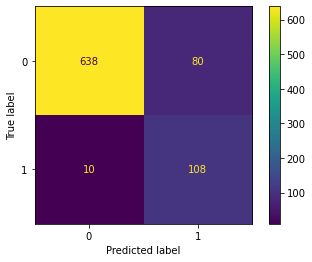

In [51]:
confusionmatrix = confusion_matrix(y_test, y_pred, labels=modelgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix,display_labels=gnb.classes_)
disp.plot()
plt.show()

Bernoulli Naive Bayes classifier

In [61]:
bnb = BernoulliNB()
bnb.fit(X_train_feat.toarray() , y_train)

BernoulliNB()

In [62]:
predict_on_train_data = bnb.predict(X_train_feat.toarray())
acc_on_train_data = accuracy_score(y_train, predict_on_train_data)

In [63]:
print('TRAINING DATA ACCURACY: ', round(acc_on_train_data * 100,3), "%")

TRAINING DATA ACCURACY:  98.872 %


PRediction on Test Data 

In [64]:
y_pred = bnb.predict(X_test_feat.toarray())
acc_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [65]:
print('TEST DATA ACCURACY : ', accuracy_on_test_data, "%")

TEST DATA ACCURACY :  96.89 %


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       718
           1       1.00      0.78      0.88       118

    accuracy                           0.97       836
   macro avg       0.98      0.89      0.93       836
weighted avg       0.97      0.97      0.97       836



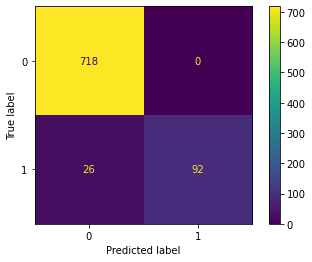

In [60]:
confusionmatrix = confusion_matrix(y_test, y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix,display_labels=bnb.classes_)
disp.plot()
plt.show()

Logistic Regression 

In [68]:
lr = LogisticRegression()
lr.fit(X_train_feat, y_train)

LogisticRegression()

In [69]:
# prediction on training data
predict_on_train_data = lr.predict(X_train_feat)
acc_on_train_data = round(accuracy_score(y_train, predict_on_train_data) * 100,3)

In [70]:
print('TRAINING DATA ACCURACY : ', acc_on_train_data, "%")

TRAINING DATA ACCURACY :  96.719 %


Prediction on test data 

In [74]:
y_pred = lr.predict(X_test_feat)
acc_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [75]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  96.89 %


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       718
           1       1.00      0.69      0.81       118

    accuracy                           0.96       836
   macro avg       0.98      0.84      0.89       836
weighted avg       0.96      0.96      0.95       836



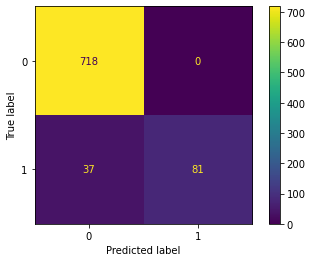

In [76]:
confusionmatrix = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix,display_labels=lr.classes_)
disp.plot()
plt.show()

In spam email problem, precision is more important since the cost of false positive is high. i.e We don't want a genuine emails to be classified as spam .
Here, Gaussian gives the best precision. Hence we can choose gaussian Naive Bayes .